In [1]:
# Cosas varias de forma

%matplotlib inline
from IPython import embed
from IPython.display import display

# Carga cosas necesarias
from graficos import *
from loadUmbral import *
from DownloadFile import *
from plotConvergencia import *
from Scripts import *

# Carga la configuracion
settings = {}
settings['FilterCodeVersion'] = 12 # 0 es sin filtro
settings['FilterLevelVersion'] = 0 # 0 es sin filtro
settings['FilterResourcesVersion'] = 0 # 0 es sin filtro
settings['ShowTimeline'] = True
settings['ShowPlotsPorLevel'] = True

,AnguloReferencia,AppVersion,CumpleCriterioCola,DesviacionDeltaTita,Identificador,Level,LevelVersion,MediaDeltaTita,Session,Usuario
0,-6,UmbralCompleto,True,0.588045,Dato no cargado,2015-12-03 17:41:19.641000,22,3.808238,2015-12-03 17:41:17.555000,Usr1
1,-3,UmbralCompleto,True,0.144674,Dato no cargado,2015-12-03 17:48:37.052999,22,2.730550,2015-12-03 17:41:17.555000,Usr1
2,0,UmbralCompleto,True,0.104741,Dato no cargado,2015-12-03 17:53:21.079999,22,0.976917,2015-12-03 17:41:17.555000,Usr1
3,3,UmbralCompleto,True,0.276400,Dato no cargado,2015-12-03 17:57:32.505000,22,1.832460,2015-12-03 17:41:17.555000,Usr1
4,6,UmbralCompleto,True,0.265225,Dato no cargado,2015-12-03 18:01:34.888999,22,1.773496,2015-12-03 17:41:17.555000,Usr1
5,10,UmbralCompleto,True,0.870459,Dato no cargado,2015-12-03 18:07:45.049000,22,3.681796,2015-12-03 17:41:17.555000,Usr1
6,20,UmbralCompleto,False,2.557192,Dato no cargado,2015-12-03 18:16:38.828999,22,11.355196,2015-12-03 17:41:17.555000,Usr1
7,30,UmbralCompleto,True,1.504827,Dato no cargado,2015-12-03 18:20:29.528000,22,14.802421,2015-12-03 17:41:17.555000,Usr1
8,40,UmbralCompleto,True,1.487434,Dato no cargado,2015-12-03 18:26:49.490999,22,11.845882,2015-12-03 17:41:17.555000,Usr1
9,50,UmbralCompleto,False,1.375946,Dato no cargado,2015-12-03 18:41:40.253000,22,7.820095,2015-12-03 17:41:17.555000,Usr1


/home/ionatan/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


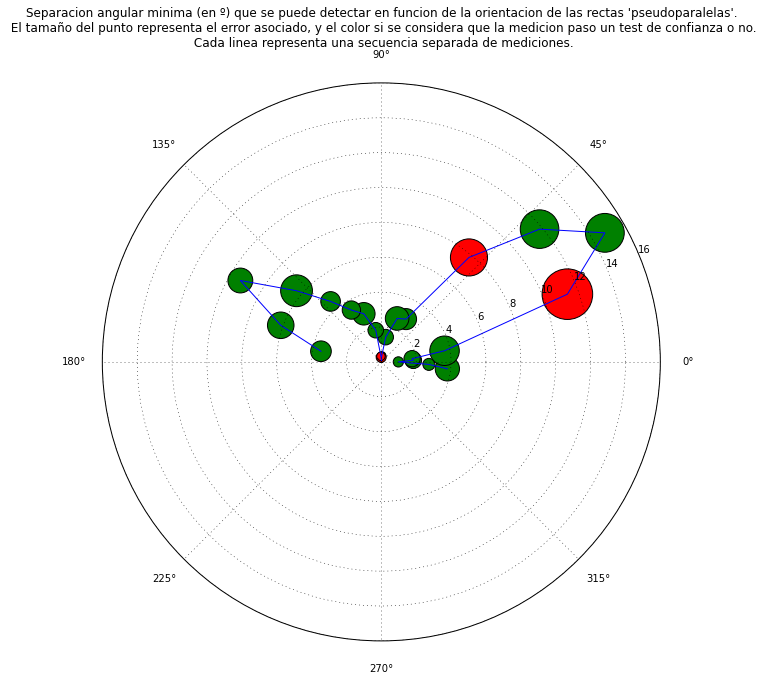

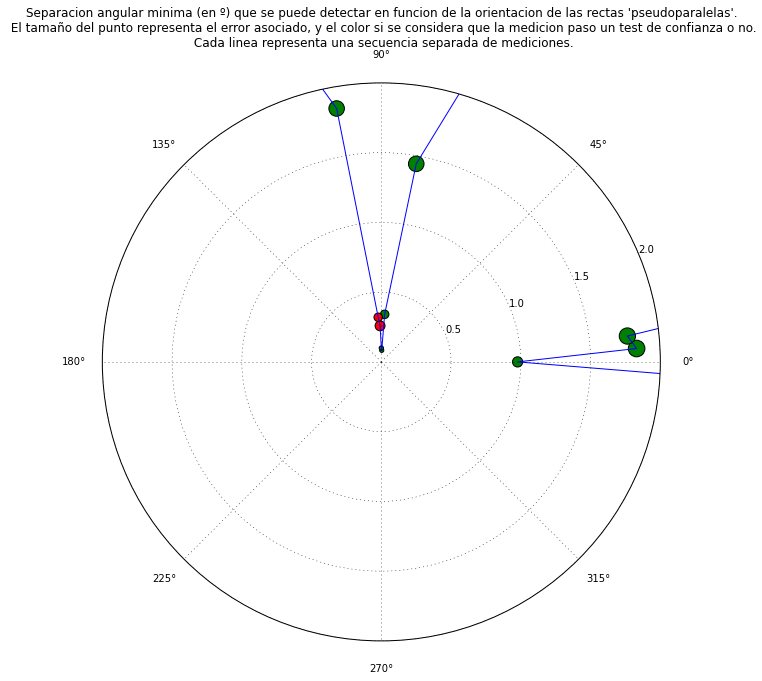

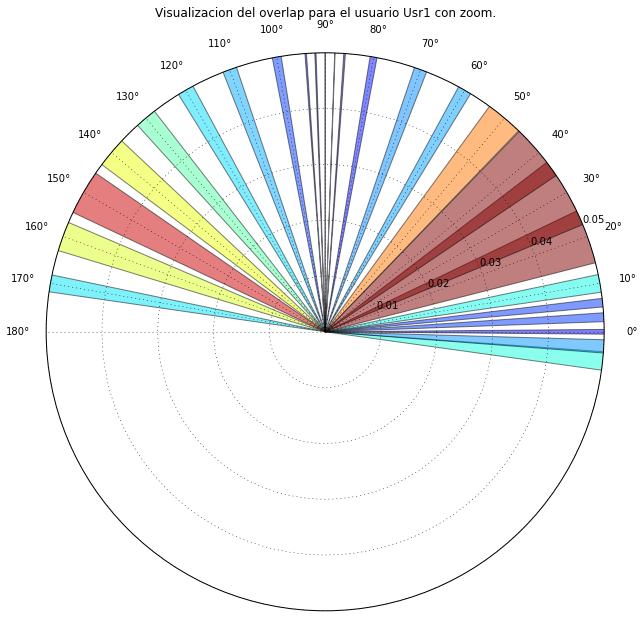

In [94]:
# Rutina para chequear que los datos en tiempo real
#DownloadFile()
#touchs, sounds = load(settings)
#makeTimeline(touchs, sounds)
#plotConvergencia(touchs)
plotResumen(buscarUmbral(touchs))
buscarUmbral(touchs)

In [93]:

def plotResumen (resumen):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.cm as cm
    
    resumen['ReferenciaEnRadianes'] = resumen['AnguloReferencia']/180*np.pi
    resumen['MediaDeltaTitaRad'] = resumen['MediaDeltaTita']/180*np.pi
    resumen['RefRadCorregida'] = resumen['ReferenciaEnRadianes'] - resumen['MediaDeltaTitaRad']/2
    resumen['Color'] = ['g' if x else 'r' for x in resumen['CumpleCriterioCola'].tolist() ] 
    resumen['Identificador'].fillna('SinDato',inplace=True)
    
    # Esto es solo temporal
    #resumen['Identificador'].replace(['Detalle90'], ['SinDato'],  inplace=True) 
    #resumen[resumen['Identificador']=='Detalle90']['Identificador']='SinDato'
    
    
    fig = plt.figure(num=None, figsize=(10, 10), dpi=180, facecolor='w', edgecolor='k')
    ax = plt.subplot(111, projection='polar')
    ax.set_title("Separacion angular minima (en º) que se puede detectar en funcion de la orientacion de las rectas \'pseudoparalelas\'. \n El tamaño del punto representa el error asociado, y el color si se considera que la medicion paso un test de confianza o no. \n Cada linea representa una secuencia separada de mediciones.", va='bottom')

    for user in resumen['Usuario'].unique():
        resumenFiltrado = resumen[resumen['Usuario']==user]
        
        x = resumenFiltrado['ReferenciaEnRadianes'].tolist()
        y = resumenFiltrado['MediaDeltaTita'].tolist()
        color = resumenFiltrado['Color'].tolist()
        size = resumenFiltrado['DesviacionDeltaTita']
    
        ax.plot(x, y)
        ax.scatter(x, y, marker='o', c=color, s=1000*size, label='the data')

        fig2, ax2 = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

        ax2.set_title("Visualizacion del overlap para el usuario " + user, va='bottom')
        ax2.set_xticks(np.pi/180. * np.linspace(180,  -180, 36, endpoint=False))

        theta = resumenFiltrado['RefRadCorregida'].tolist()
        radii = resumenFiltrado['MediaDeltaTita'].tolist()
        width = resumenFiltrado['MediaDeltaTitaRad'].tolist()
        bars = ax2.bar(theta, radii, width=width, bottom=0.0)
        for r,bar in zip(radii, bars):
            bar.set_facecolor( cm.jet(r/10.))
            bar.set_alpha(0.5)
        
        
        
    
    # Repetimos el plot pero con zoom
    if not all(i >= 2 for i in resumenFiltrado['MediaDeltaTita'].tolist()):
        
        ax = plt.subplot(111, projection='polar')
        ax.set_title("Separacion angular minima (en º) que se puede detectar en funcion de la orientacion de las rectas \'pseudoparalelas\'. \n El tamaño del punto representa el error asociado, y el color si se considera que la medicion paso un test de confianza o no. \n Cada linea representa una secuencia separada de mediciones.", va='bottom')
        ax.set_ylim(0,2)
                
        for user in resumen['Usuario'].unique():
            resumenFiltrado = resumen[resumen['Usuario']==user]

            x = resumenFiltrado['ReferenciaEnRadianes'].tolist()
            y = resumenFiltrado['MediaDeltaTita'].tolist()
            color = resumenFiltrado['Color'].tolist()
            size = resumenFiltrado['DesviacionDeltaTita']

            ax.plot(x, y)
            ax.scatter(x, y, marker='o', c=color, s=1000*size, label='the data')


            fig3, ax3 = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

            ax3.set_title("Visualizacion del overlap para el usuario " + user +" con zoom.", va='bottom')
            ax3.set_xticks(np.pi/180. * np.linspace(180,  -180, 36, endpoint=False))
            ax3.set_ylim(0,0.05)
            
            theta = resumenFiltrado['RefRadCorregida'].tolist()
            radii = resumenFiltrado['MediaDeltaTita'].tolist()
            width = resumenFiltrado['MediaDeltaTitaRad'].tolist()
            bars = ax3.bar(theta, radii, width=width, bottom=0.0)
            for r,bar in zip(radii, bars):
                bar.set_facecolor( cm.jet(r/10.))
                bar.set_alpha(0.5)





In [5]:
guardarComoSounds (sounds, 'Datos previos medicion umbral completa (sounds)')

'Archivo guardado'